#### 计算复杂介质中的走时场 及 射线追踪

In [1]:
import pyfmm
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def gaussian_kernel(x, y, sigma=1.0):
    K = np.exp(-np.sqrt(x*x + y*y) / (2 * sigma ** 2))
    return K

In [3]:
xarr = np.arange(0, 100, 0.08)
yarr = np.arange(0, 50, 0.05)
zarr = np.array([0.0])  # 二维情况

# 慢度场
slw  = np.ones((len(xarr), len(yarr), len(zarr)), dtype='f')

XX, YY = np.meshgrid(xarr, yarr, indexing='ij')

# 随意添加一些异常
slw += 3*gaussian_kernel(XX-20, YY-30, 3)[:,:,None]
slw += 2*gaussian_kernel(XX-60, YY-10, 4)[:,:,None]
slw -= gaussian_kernel(XX-30, YY-20, 5)[:,:,None]
slw -= gaussian_kernel(XX-80, YY-40, 4)[:,:,None]


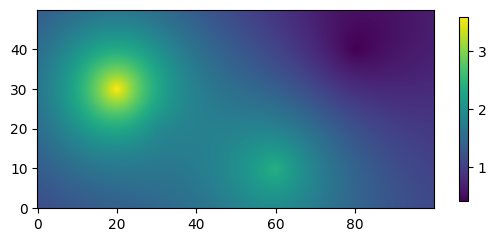

In [4]:
# 慢度分布
fig, ax = plt.subplots(1, 1)
pcm = ax.pcolormesh(xarr, yarr, slw[...,0].T)
ax.set_aspect('equal')
fig.colorbar(pcm, shrink=0.5)

In [5]:
srcloc = [10, 20, 0.0]

# FMM解
TT = pyfmm.travel_time_source(
    srcloc,
    xarr, yarr, zarr, slw)

In [6]:
# 射线追踪
rcvloc = [90, 40, 0.0]

travt, rays = pyfmm.raytracing(
    TT, srcloc, rcvloc, xarr, yarr, zarr, 0.1)
print(f"traveltime={travt:.3f}")


traveltime=119.926


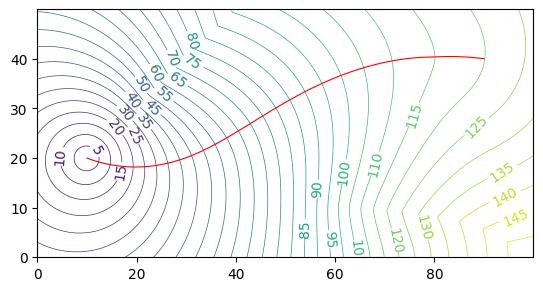

In [7]:
fig, ax = plt.subplots(1, 1)
cs = ax.contour(xarr, yarr, TT[:, :, 0].T, levels=30, linewidths=0.5)
ax.clabel(cs)
ax.plot(rays[:,0], rays[:,1], c='r', lw=0.8)

ax.set_aspect('equal')

WARNING! For parallel FSM, maxLoops must set at least 2 (already changed).
traveltime=119.944


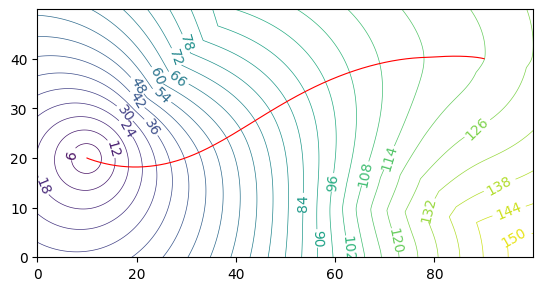

In [8]:
# Fast Sweeping

FSMTT = pyfmm.travel_time_source(
    srcloc,
    xarr, yarr, zarr, slw, useFSM=True, FSMparallel=True)

travt, rays = pyfmm.raytracing(
    FSMTT, srcloc, rcvloc, xarr, yarr, zarr, 0.1)
print(f"traveltime={travt:.3f}")

fig, ax = plt.subplots(1, 1)
cs = ax.contour(xarr, yarr, FSMTT[:, :, 0].T, levels=30, linewidths=0.5)
ax.clabel(cs)
ax.plot(rays[:,0], rays[:,1], c='r', lw=0.8)

ax.set_aspect('equal')